# Final Project - Analyzing Sales Data

**Date**: 30 December 2022

**Author**: Poonna Pipatpanukul

**Course**: `Pandas Foundation`

In [1]:
# import data
import pandas as pd
import numpy as np

df = pd.read_csv("sample-store.csv")

In [2]:
# preview top 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,6/12/2019,6/16/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# shape of dataframe
df.shape

(9994, 21)

In [4]:
# see data frame information using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

We can use `pd.to_datetime()` function to convert columns 'Order Date' and 'Ship Date' to datetime.

In [5]:
# example of pd.to_datetime() function
pd.to_datetime(df['Order Date'].head(), format='%m/%d/%Y')

0   2019-11-08
1   2019-11-08
2   2019-06-12
3   2018-10-11
4   2018-10-11
Name: Order Date, dtype: datetime64[ns]

In [6]:
# 01 - convert order date and ship date to datetime in the original dataframe
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

In [7]:
 # 02 - count nan in postal code column
df['Postal Code'].isna().sum()

11

In [8]:
# 03 - filter rows with missing values
df = df.dropna()

In [9]:
# 04 - Explore this dataset on your owns, ask your own questions

# Set order date as the index for futher analysis
df = df.set_index(['Order Date']).sort_index()

In [10]:
# Which sub-category has the highest historical sales growth?
df['OrdYear'] = df.index.year
yearly_sales = df.groupby(['Sub-Category', 'OrdYear'])['Sales'].sum().unstack(0).T
yearly_sales['CAGR'] = (yearly_sales[2020]/yearly_sales[2017]) ** (1/(2020-2018)) - 1
yearly_sales.sort_values('CAGR', ascending=False).round(2).head()

OrdYear,2017,2018,2019,2020,CAGR
Sub-Category,,,,,
Copiers,10849.78,26179.45,49599.41,62899.39,1.41
Appliances,15313.62,23241.29,26050.32,42383.99,0.66
Accessories,25014.27,40523.96,41795.87,59741.20,0.55
Furnishings,13826.23,21089.71,27874.12,28915.09,0.45
Paper,14834.96,15287.64,20661.89,27602.52,0.36


In [11]:
# Which sub-category and and state has the highest profit margin?
def calc_NPM_count(x):
    return pd.Series({
        'NPM': x['Profit'].sum() / x['Sales'].sum() * 100,
        'Count': len(x),
    })

df.groupby('Sub-Category').apply(calc_NPM_count).sort_values('NPM', ascending=False).head(7).round(2)

,NPM,Count
Sub-Category,,
Labels,44.42,364.0
Paper,43.39,1368.0
Envelopes,42.27,253.0
Copiers,37.20,68.0
Fasteners,31.40,217.0
Accessories,25.03,773.0
Art,24.07,795.0


In [12]:
df.groupby('State').apply(calc_NPM_count).sort_values('NPM', ascending=False).head(7).round(2)

,NPM,Count
State,,
District of Columbia,36.98,10.0
Delaware,36.35,96.0
Minnesota,36.24,89.0
Maine,35.77,8.0
Arkansas,34.33,60.0
Indiana,34.33,149.0
Georgia,33.10,184.0


## Data Analysis Part

Answer 10 below questions to get credit from this course. Write `pandas` code to find answers.

In [13]:
# 01 - how many columns, rows in this dataset
df.shape

(9983, 21)

In [14]:
# 02 - is there any missing values?, if there is, which colunm? how many nan values?

# No missing values because we already filtered it out above.
nan_count = df.isna().sum()
nan_count[nan_count > 0]

Series([], dtype: int64)

In [15]:
# 03 - your friend ask for `California` data, filter it and export csv for him
new_df = df[df['State'] == 'California']
new_df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,OrdYear
Order Date,,,,,,,,,,,,,,,,,,,,,
2017-01-06,5328,CA-2017-130813,2017-01-08,Second Class,LS-17230,Lycoris Saunders,Consumer,United States,Los Angeles,California,...,West,OFF-PA-10002005,Office Supplies,Paper,Xerox 225,19.440,3,0.00,9.3312,2017
2017-01-13,4938,CA-2017-157147,2017-01-18,Standard Class,BD-11605,Brian Dahlen,Consumer,United States,San Francisco,California,...,West,OFF-ST-10000078,Office Supplies,Storage,Tennsco 6- and 18-Compartment Lockers,1325.850,5,0.00,238.6530,2017
2017-01-13,4940,CA-2017-157147,2017-01-18,Standard Class,BD-11605,Brian Dahlen,Consumer,United States,San Francisco,California,...,West,OFF-AR-10003514,Office Supplies,Art,4009 Highlighters by Sanford,19.900,5,0.00,6.5670,2017
2017-01-13,4939,CA-2017-157147,2017-01-18,Standard Class,BD-11605,Brian Dahlen,Consumer,United States,San Francisco,California,...,West,FUR-BO-10003034,Furniture,Bookcases,"O'Sullivan Elevations Bookcase, Cherry Finish",333.999,3,0.15,3.9294,2017
2017-01-20,5737,CA-2017-148614,2017-01-25,Standard Class,MV-17485,Mark Van Huff,Consumer,United States,Los Angeles,California,...,West,OFF-PA-10002893,Office Supplies,Paper,"Wirebound Service Call Books, 5 1/2"" x 4""",19.360,2,0.00,9.2928,2017


In [16]:
new_df.to_csv('California.csv')

In [17]:
# 04 - your friend ask for all order data in `California` and `Texas` in 2017 (look at Order Date), send him csv file
new_df = df.loc['2017'].query('State == "California" or State == "Texas"')
new_df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,OrdYear
Order Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,7981,CA-2017-103800,2017-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,...,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,2017
2017-01-06,5328,CA-2017-130813,2017-01-08,Second Class,LS-17230,Lycoris Saunders,Consumer,United States,Los Angeles,California,...,West,OFF-PA-10002005,Office Supplies,Paper,Xerox 225,19.440,3,0.0,9.3312,2017
2017-01-07,7662,CA-2017-105417,2017-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,...,Central,OFF-BI-10003708,Office Supplies,Binders,Acco Four Pocket Poly Ring Binder with Label H...,10.430,7,0.8,-18.2525,2017
2017-01-07,7661,CA-2017-105417,2017-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,...,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096,2017
2017-01-09,594,CA-2017-135405,2017-01-13,Standard Class,MS-17830,Melanie Seite,Consumer,United States,Laredo,Texas,...,Central,TEC-AC-10001266,Technology,Accessories,Memorex Micro Travel Drive 8 GB,31.200,3,0.2,9.7500,2017


In [18]:
new_df.to_csv('ca_tx_2017.csv')

In [19]:
# 05 - how much total sales, average sales, and standard deviation of sales your company make in 2017
df.loc['2017-01-01':'2018-01-01', 'Sales'].agg(['sum', 'mean', 'std'])

sum     484247.498100
mean       242.974159
std        754.053357
Name: Sales, dtype: float64

In [20]:
# 06 - which Segment has the highest profit in 2018
df.loc['2018'] \
    .groupby('Segment')['Profit'] \
    .sum() \
    .sort_values(ascending=False)

Segment
Consumer       28281.3665
Corporate      19675.1978
Home Office    12470.1124
Name: Profit, dtype: float64

In [21]:
# 07 - which top 5 States have the least total sales between 15 April 2019 - 31 December 2019
df['2019-04-15':'2019-12-31'] \
    .groupby('State')['Sales'] \
    .sum() \
    .sort_values(ascending=True) \
    .head(5)

State
New Hampshire            49.05
New Mexico               64.08
District of Columbia    117.07
Louisiana               249.80
South Carolina          502.48
Name: Sales, dtype: float64

In [22]:
# 08 - what is the proportion of total sales (%) in West + Central in 2019 e.g. 25%
df_2019 = df.loc['2019'].groupby('Region')['Sales'].sum()
(df_2019.loc['West'] + df_2019.loc['Central']) / df_2019.sum() * 100

55.24385724551216

In [23]:
# 09 - find top 10 popular products in terms of number of orders vs. total sales during 2019-2020
# Top 10 products by number of orders
df.loc['2019':'2020', 'Product Name'] \
    .value_counts() \
    .head(10)

Easy-staple paper                                  27
Staples                                            24
Staple envelope                                    22
Staples in misc. colors                            13
Chromcraft Round Conference Tables                 12
Staple remover                                     12
Storex Dura Pro Binders                            12
Global Wood Trimmed Manager's Task Chair, Khaki    11
Avery Non-Stick Binders                            11
GBC Instant Report Kit                             10
Name: Product Name, dtype: int64

In [24]:
# Top 10 products by total sales
df.loc['2019':'2020'] \
    .groupby('Product Name')['Sales'] \
    .sum() \
    .sort_values(ascending=False) \
    .head(10)

Product Name
Canon imageCLASS 2200 Advanced Copier                 61599.824
Hewlett Packard LaserJet 3310 Copier                  16079.732
3D Systems Cube Printer, 2nd Generation, Magenta      14299.890
GBC Ibimaster 500 Manual ProClick Binding System      13621.542
GBC DocuBind TL300 Electric Binding System            12737.258
GBC DocuBind P400 Electric Binding System             12521.108
Samsung Galaxy Mega 6.3                               12263.708
HON 5400 Series Task Chairs for Big and Tall          11846.562
Martin Yale Chadless Opener Electric Letter Opener    11825.902
Global Troy Executive Leather Low-Back Tilter         10169.894
Name: Sales, dtype: float64

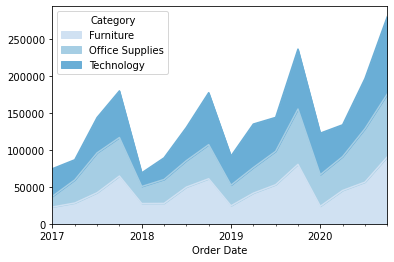

In [25]:
# 10 - plot at least 2 plots, any plot you think interesting :)

import matplotlib as mpl
import matplotlib.pyplot as plt

# Sales trends by category
df.groupby('Category').resample('Q')['Sales'].sum() \
    .unstack('Category', fill_value=0) \
    .plot.area(color = mpl.colormaps['Blues'](np.linspace(.2, .5, 3)));

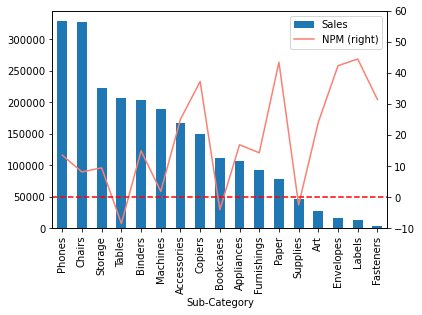

In [26]:
# Sales and profit of each sub-category
tmp = df.groupby('Sub-Category').apply(lambda x: pd.Series({
    'Sales': x['Sales'].sum(),
    'NPM': x['Profit'].sum() / x['Sales'].sum() * 100
})).sort_values('Sales', ascending=False)
ax = tmp.plot.bar(y='Sales')
ax1 = tmp.plot.line(y='NPM', color='salmon', secondary_y=True, ax=ax, rot=90)
ax1.axhline(y=0, color='red', ls='--')
ax1.set_ylim(-10, 60);

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9983 entries, 2017-01-03 to 2020-12-30
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9983 non-null   int64         
 1   Order ID        9983 non-null   object        
 2   Ship Date       9983 non-null   datetime64[ns]
 3   Ship Mode       9983 non-null   object        
 4   Customer ID     9983 non-null   object        
 5   Customer Name   9983 non-null   object        
 6   Segment         9983 non-null   object        
 7   Country/Region  9983 non-null   object        
 8   City            9983 non-null   object        
 9   State           9983 non-null   object        
 10  Postal Code     9983 non-null   float64       
 11  Region          9983 non-null   object        
 12  Product ID      9983 non-null   object        
 13  Category        9983 non-null   object        
 14  Sub-Category    9983 non-null   object

In [28]:
# Bonus - use np.where() to create new column in dataframe to help you answer your own questions

# What are the states that mostly sold products at a loss?
df['Profitable'] = np.where(df['Profit'] >= 0, 'Break-even or profit', 'Loss')

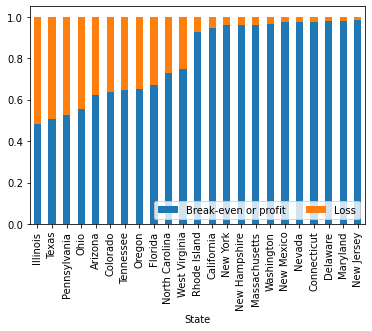

In [29]:
count_df = pd.crosstab(df['State'], df['Profitable'])
count_df.div(count_df.sum(axis=1), axis=0) \
    .query('Loss > 0') \
    .sort_values('Loss', ascending=False) \
    .plot.bar(stacked=True)

plt.legend(loc='lower right', ncol=2)